In [1]:
import os
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import List

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset, IterableDataset
from torchvision import transforms

from diffusion_model import DeviceManager, LearningRateScheduler, \
    CatDataset, NoiseScheduler, Block, SinusidalPositionEmbeddings, SimpleUnet

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device_manager = DeviceManager(0, 1, True, device)

model_path = r"models\cat-diffusion-64px\model.pt"

In [3]:
checkpoint = torch.load(model_path)

model = SimpleUnet()
model.to(device_manager.device)
model.load_state_dict(checkpoint["model"])

C:\Users\Email.LIT\AppData\Local\Temp\ipykernel_17652\2449564407.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


<All keys matched successfully>

### Inference code

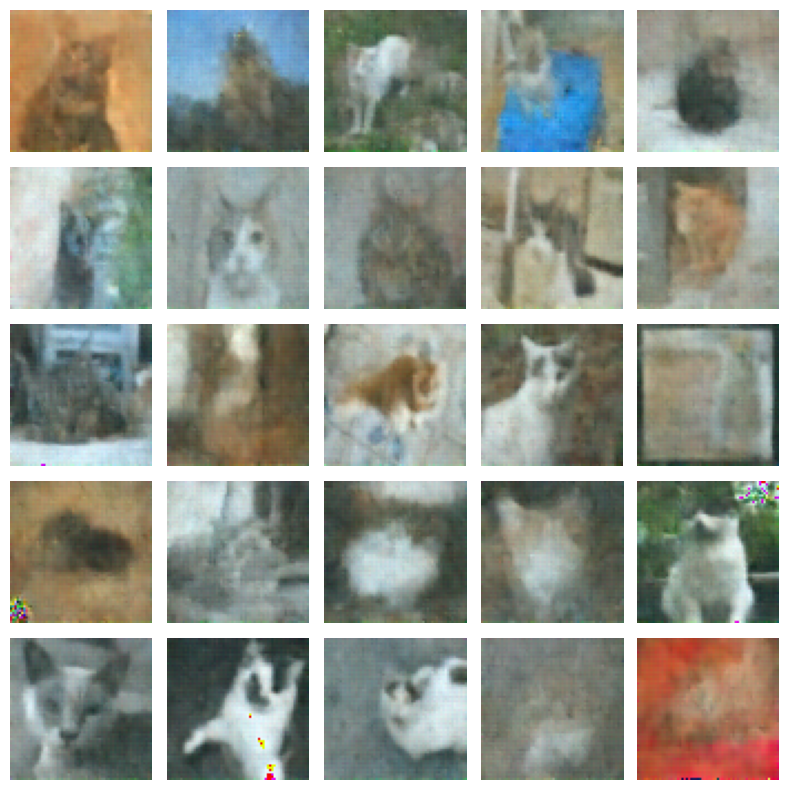

In [5]:
T = 300
image_size = 64
count_x = 5
count_y = 5

noise_scheduler = NoiseScheduler(T, device_manager)
noises = torch.randn((count_x*count_y, 3, image_size, image_size), device=device_manager.device)

images = model.generate_images(noises, T, noise_scheduler, device_manager).cpu()

fig, axes = plt.subplots(count_y, count_x, figsize=(8, 8))
axes = axes.flatten()

for ax, image in zip(axes, images):
    pil_image = model.reverse_transform(image)
    ax.imshow(pil_image)
    ax.axis('off')

plt.tight_layout()
plt.show()